# Indie Vs Triple A

The gaming industry has seen a shift in recent years, that being the rise of independent developers. In the early 2000s, the idea that indie games could be anything close to good was a pipedream. The general consensus was that only triple A studios had the expertise and budget to make a "real" video game. However, in 2008, the indie game **Braid** was released, revealing to the world that there is potential for the independent creator to make an indie game worthy of critical acclaim. Since then, there has been a significant shift in player sentiment as indie games have legitimized their place in their genre and a growing disdain toward triple A studios due to the overcommercialization of games. Thus, my project aims to study the shifts in player sentiment over the past few years to see if these trends are backed by data from the popular game distribution platform Steam. This project aims to answer the following questions:

- Has views on indie games become more positive over time?
- Has views on triple A games become more negative over time?
- Does price have a factor on player sentiment and has it changed over time?
- **Have indie games surpassed triple A games in player sentiment?**

## Preprocessing
The data I'll be using is comprised of two datasets, the [100 Million+ Steam Reviews](https://www.kaggle.com/datasets/kieranpoc/steam-reviews) dataset by KieranPO'C and the [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset) by Martin Bustos. Due to the sheer size of these two datasets (making thus not available in this Github) and the inability to direct download the files (Kaggle has download restrictions), you will need a Kaggle account to download the datasets yourself if you wish to run this code on your own machine. In a data

In [88]:
# Import Steam Dataset

import pandas as pd

game_info_dataset = pd.read_json("data/games.json")
game_info_dataset = game_info_dataset.transpose()
game_review_dataset = pd.read_csv("Data/all_reviews.csv")
dataset = pd.merge(game_info_dataset, game_review_dataset, left_on='name', right_on='game')

dataset = dataset.drop(
    ["app_name", "median_playtime_forever", "median_playtime_2weeks", "average_playtime_2weeks", 
     "header_image", "peak_ccu", "app_id", "dlc_count", "reviews", "support_url", "support_email", 
     "website", "windows", "mac", "linux", "metacritic_score", "metacritic_url", "achievements",
     "recommendations", "notes", "supported_languages", "full_audio_languages", "packages", "developers",
     "publishers", "categories", "screenshots", "movies", "user_score", "score_rank", "appid", "author_steamid", 
     "author_num_games_owned", "author_num_reviews", "author_playtime_forever", "author_playtime_last_two_weeks", 
     "author_playtime_at_review", "author_last_played", "votes_up", "votes_funny", "weighted_vote_score", "comment_count",
     "steam_purchase", "received_for_free", "written_during_early_access", "hidden_in_steam_china", "steam_china_location",
     "recommendationid", "timestamp_updated", "tags"
    ]
    , axis=1, errors='ignore')
dataset["release_date"] = pd.to_datetime(dataset["release_date"], format='mixed')
dataset['release_year'] = dataset['release_date'].dt.year
dataset['release_month'] = dataset['release_date'].dt.month

indie_dataset = dataset[dataset.genres.map(lambda x : "Indie" in x)]
nonindie_dataset = dataset[dataset.genres.map(lambda x : "Indie" not in x)]

<Axes: xlabel='release_year'>

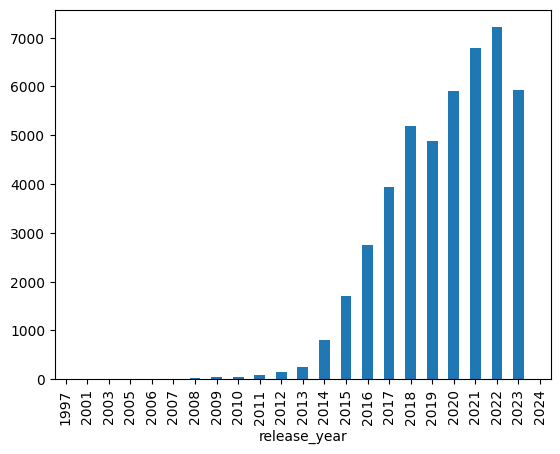

In [91]:
indie_dataset.drop_duplicates("name").groupby(by=['release_year']).size().plot(kind="bar")

<Axes: xlabel='release_year'>

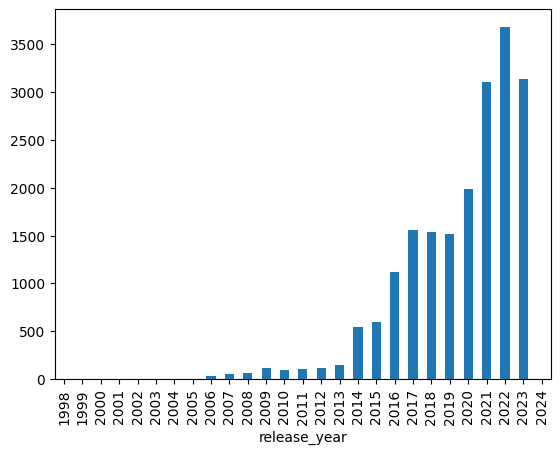

In [92]:
nonindie_dataset.drop_duplicates("name").groupby(by=['release_year']).size().plot(kind="bar")